In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('UCIM.xlsx')

In [3]:
df.head(10)

,date,year,month,day,air_pressure,air_temp,cumulative_rain_hours,cumulative_snow_hours,dew_point,wind_speed,pm2.5,Hazard Level,AQI
0,2010-01-01,2010,1,1,1017.083333,-6.750000,0.0,0.000000,-18.750000,14.458333,89.314107,3,168.459339
1,2010-01-02,2010,1,2,1024.750000,-5.125000,0.0,0.708333,-8.500000,24.860000,145.958333,3,197.706621
2,2010-01-03,2010,1,3,1022.791667,-8.541667,0.0,14.166667,-10.125000,70.937917,78.833333,3,163.047770
3,2010-01-04,2010,1,4,1029.291667,-11.500000,0.0,0.000000,-20.875000,111.160833,31.333333,1,91.447783
4,2010-01-05,2010,1,5,1033.625000,-14.458333,0.0,0.000000,-24.583333,56.920000,42.458333,2,118.133585
5,2010-01-06,2010,1,6,1033.750000,-12.541667,0.0,0.000000,-23.708333,18.511667,56.416667,3,151.473305
6,2010-01-07,2010,1,7,1034.083333,-12.500000,0.0,0.000000,-21.250000,10.170000,69.000000,3,157.970495
7,2010-01-08,2010,1,8,1028.000000,-11.708333,0.0,0.000000,-17.125000,1.972917,176.208333,4,226.476727
8,2010-01-09,2010,1,9,1029.041667,-9.125000,0.0,0.000000,-16.333333,13.298750,88.500000,3,168.038988
9,2010-01-10,2010,1,10,1032.500000,-8.750000,0.0,0.000000,-15.958333,17.415833,57.250000,3,151.903583


In [4]:
df.columns

Index(['date', 'year', 'month', 'day', 'air_pressure', 'air_temp',
       'cumulative_rain_hours', 'cumulative_snow_hours', 'dew_point',
       'wind_speed', 'pm2.5', 'Hazard Level', 'AQI'],
      dtype='object')

In [5]:
dataset = df[['date', 'month', 'day', 'air_pressure', 'air_temp',
       'cumulative_rain_hours', 'cumulative_snow_hours', 'dew_point',
       'wind_speed', 'pm2.5', 'Hazard Level', 'AQI']]

In [24]:
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright",15)

C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


In [25]:
#Select predictors
x = dataset[dataset.columns[1:10]]
#Target variable 
y = dataset[dataset.columns[10]]

In [26]:
MACHINE_EPSILON = np.finfo(np.double).eps
n_components = 2
perplexity = 30

<Figure size 720x432 with 0 Axes>

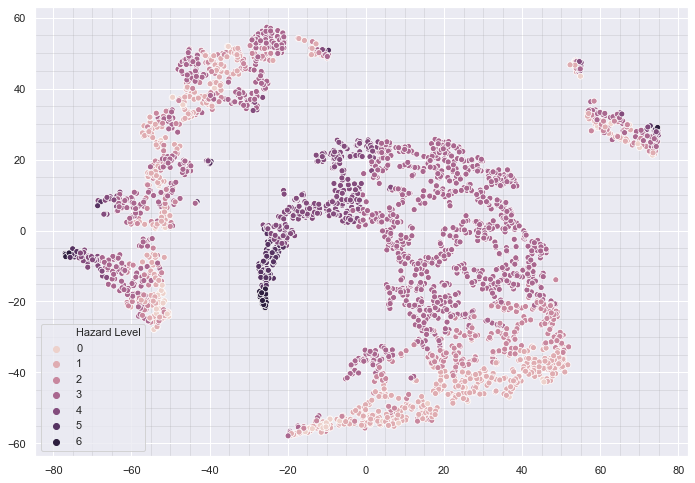

In [27]:
tsne = TSNE()
X_embedded = tsne.fit_transform(x)
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full')
sns.set(style='whitegrid',)

In [5]:
dataset = df[['date', 'month', 'day', 'air_pressure', 'air_temp',
       'cumulative_rain_hours', 'cumulative_snow_hours', 'dew_point',
       'wind_speed', 'pm2.5']]

In [6]:
from collections import Counter
cut = int(dataset.shape[0]*0.8)
train = dataset.loc[:cut]
test = dataset.loc[cut:]

train = train.drop(['date'], axis=1)
test = test.drop(['date'], axis=1)

In [7]:
for s in range(1,25):
    train['shift_{}'.format(s)] = train['pm2.5'].shift(s)
    test['shift_{}'.format(s)] = test['pm2.5'].shift(s)

In [8]:
scaler = StandardScaler()
X_train = train.dropna().drop('pm2.5', axis=1)
y_train = train.dropna()[['pm2.5']]

X_test = test.dropna().drop('pm2.5', axis=1)
y_test = test.dropna()[['pm2.5']]

X_train_sc = StandardScaler().fit_transform(X_train)
scaler.fit(y_train)
y_train_sc = StandardScaler().fit_transform(y_train)

X_test_sc = StandardScaler().fit_transform(X_test)
scaler.fit(y_test)
y_test_sc = StandardScaler().fit_transform(y_test)

In [9]:
train.to_csv('trainucim.csv')

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.optimizers import Adagrad
from keras.optimizers import Adadelta
from keras import regularizers
import keras.backend as K

Using TensorFlow backend.
C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hp\Anaconda3\envs\Titanium\lib\site-pa

In [11]:
## Hyperparameter for Deep Learning
learning_rate = 0.01
training_epochs = 200
display_step = 200
factor = 0.10
batch = 128
seed = 7
beta_1 = 0.9
beta_2 = 0.999
epsilon = None
decay = 0.001
np.random.seed(seed)
dims = X_train_sc.shape[1]

In [11]:
model = Sequential()
model.add(Dense(128,
                input_shape=(dims,),
                activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)  

In [12]:
model.compile(loss='mean_squared_error', optimizer=Adadelta(lr=learning_rate))
history = model.fit(X_train_sc,y_train_sc,
                    batch_size=batch,
                    epochs=training_epochs,
                    validation_data=(X_test_sc, y_test_sc)) 

Instructions for updating:
Use tf.cast instead.
Train on 2279 samples, validate on 552 samples
Epoch 1/200
2279/2279 [==============================] - 1s 629us/step - loss: 1.8162 - val_loss: 1.5291
Epoch 2/200
2279/2279 [==============================] - 0s 22us/step - loss: 1.7954 - val_loss: 1.5241
Epoch 3/200
2279/2279 [==============================] - 0s 22us/step - loss: 1.7580 - val_loss: 1.5194
Epoch 4/200
2279/2279 [==============================] - 0s 22us/step - loss: 1.7517 - val_loss: 1.5150
Epoch 5/200
2279/2279 [==============================] - 0s 22us/step - loss: 1.7553 - val_loss: 1.5105
Epoch 6/200
2279/2279 [==============================] - 0s 22us/step - loss: 1.7626 - val_loss: 1.5064
Epoch 7/200
2279/2279 [==============================] - 0s 22us/step - loss: 1.7857 - val_loss: 1.5026
Epoch 8/200
2279/2279 [==============================] - 0s 22us/step - loss: 1.7284 - val_loss: 1.4990
Epoch 9/200
2279/2279 [==============================] - 0s 22us/step - 

2279/2279 [==============================] - 0s 22us/step - loss: 1.5776 - val_loss: 1.3792
Epoch 77/200
2279/2279 [==============================] - 0s 23us/step - loss: 1.5530 - val_loss: 1.3779
Epoch 78/200
2279/2279 [==============================] - 0s 23us/step - loss: 1.5480 - val_loss: 1.3769
Epoch 79/200
2279/2279 [==============================] - 0s 23us/step - loss: 1.5460 - val_loss: 1.3758
Epoch 80/200
2279/2279 [==============================] - 0s 22us/step - loss: 1.5488 - val_loss: 1.3749
Epoch 81/200
2279/2279 [==============================] - 0s 23us/step - loss: 1.5342 - val_loss: 1.3735
Epoch 82/200
2279/2279 [==============================] - 0s 22us/step - loss: 1.5384 - val_loss: 1.3724
Epoch 83/200
2279/2279 [==============================] - 0s 21us/step - loss: 1.5007 - val_loss: 1.3714
Epoch 84/200
2279/2279 [==============================] - 0s 22us/step - loss: 1.5435 - val_loss: 1.3704
Epoch 85/200
2279/2279 [==============================] - 0s 21us/st

<Figure size 720x432 with 0 Axes>

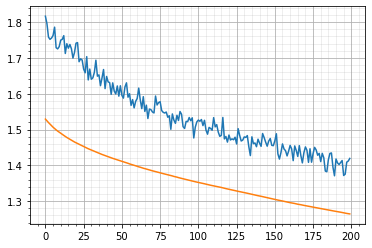

In [13]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

<Figure size 720x432 with 0 Axes>

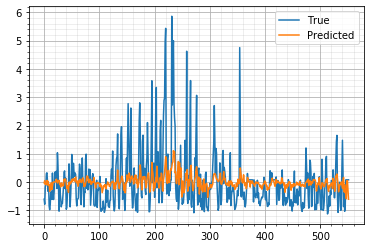

In [14]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
y_pred = model.predict(X_test_sc)
plt.plot(y_test_sc, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()

In [15]:
preds = model.predict(X_test_sc)
preds = scaler.inverse_transform(preds)

Ytest = scaler.inverse_transform(y_test_sc)
 


<Figure size 720x432 with 0 Axes>

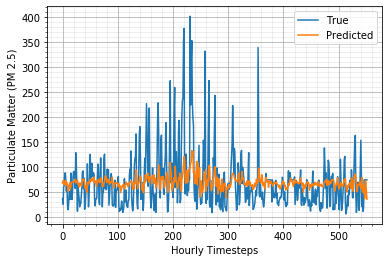

In [16]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.plot(Ytest, label='True')
plt.plot(preds, label='Predicted')
plt.xlabel("Hourly Timesteps")
plt.ylabel("Particulate Matter (PM 2.5)")
plt.legend()

## Time Series LSTM

In [52]:
X_tr_t = X_train_sc.reshape(X_train_sc.shape[0], 1, X_train_sc.shape[1])
X_tst_t = X_test_sc.reshape(X_test_sc.shape[0], 1, X_test_sc.shape[1])

In [53]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(1, dims),
                    activation='relu',kernel_initializer='lecun_uniform',
                    return_sequences=False,
                    kernel_regularizer=regularizers.l2(0.01)))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer=Adam(lr=learning_rate))
history_model_lstm = model_lstm.fit(X_tr_t,y_train_sc,epochs=training_epochs,
                                    batch_size=batch,verbose=1,shuffle=False,
                                    validation_data=(X_tst_t, y_test_sc))

Train on 2279 samples, validate on 552 samples
Epoch 1/200
2279/2279 [==============================] - 0s 190us/step - loss: 3.4007 - val_loss: 1.4688
Epoch 2/200
2279/2279 [==============================] - 0s 31us/step - loss: 1.0133 - val_loss: 0.7788
Epoch 3/200
2279/2279 [==============================] - 0s 32us/step - loss: 0.7594 - val_loss: 0.7751
Epoch 4/200
2279/2279 [==============================] - 0s 31us/step - loss: 0.6883 - val_loss: 0.6600
Epoch 5/200
2279/2279 [==============================] - 0s 31us/step - loss: 0.6880 - val_loss: 0.6868
Epoch 6/200
2279/2279 [==============================] - 0s 30us/step - loss: 0.6472 - val_loss: 0.6920
Epoch 7/200
2279/2279 [==============================] - 0s 31us/step - loss: 0.6242 - val_loss: 0.7079
Epoch 8/200
2279/2279 [==============================] - 0s 31us/step - loss: 0.5959 - val_loss: 0.7872
Epoch 9/200
2279/2279 [==============================] - 0s 30us/step - loss: 0.6307 - val_loss: 0.7414
Epoch 10/200
227

2279/2279 [==============================] - 0s 31us/step - loss: 0.5030 - val_loss: 1.1559
Epoch 79/200
2279/2279 [==============================] - 0s 29us/step - loss: 0.4418 - val_loss: 1.1815
Epoch 80/200
2279/2279 [==============================] - 0s 29us/step - loss: 0.4438 - val_loss: 1.1337
Epoch 81/200
2279/2279 [==============================] - 0s 29us/step - loss: 0.4272 - val_loss: 1.0892
Epoch 82/200
2279/2279 [==============================] - 0s 30us/step - loss: 0.4213 - val_loss: 0.9878
Epoch 83/200
2279/2279 [==============================] - 0s 30us/step - loss: 0.4790 - val_loss: 0.8687
Epoch 84/200
2279/2279 [==============================] - 0s 31us/step - loss: 0.4684 - val_loss: 1.2008
Epoch 85/200
2279/2279 [==============================] - 0s 31us/step - loss: 0.5126 - val_loss: 0.9533
Epoch 86/200
2279/2279 [==============================] - 0s 31us/step - loss: 0.4596 - val_loss: 1.0768
Epoch 87/200
2279/2279 [==============================] - 0s 31us/st

2279/2279 [==============================] - 0s 30us/step - loss: 0.3680 - val_loss: 1.0734
Epoch 156/200
2279/2279 [==============================] - 0s 31us/step - loss: 0.3743 - val_loss: 0.9694
Epoch 157/200
2279/2279 [==============================] - 0s 30us/step - loss: 0.3754 - val_loss: 0.8946
Epoch 158/200
2279/2279 [==============================] - 0s 30us/step - loss: 0.3657 - val_loss: 1.0869
Epoch 159/200
2279/2279 [==============================] - 0s 30us/step - loss: 0.4106 - val_loss: 0.9357
Epoch 160/200
2279/2279 [==============================] - 0s 31us/step - loss: 0.3927 - val_loss: 1.0060
Epoch 161/200
2279/2279 [==============================] - 0s 30us/step - loss: 0.4034 - val_loss: 0.8855
Epoch 162/200
2279/2279 [==============================] - 0s 29us/step - loss: 0.4257 - val_loss: 1.2595
Epoch 163/200
2279/2279 [==============================] - 0s 30us/step - loss: 0.4742 - val_loss: 0.9215
Epoch 164/200
2279/2279 [==============================] - 0

NameError: name 'history' is not defined

<Figure size 720x432 with 0 Axes>

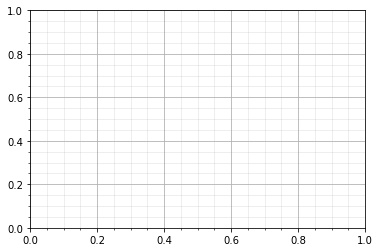

In [45]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.plot(history.history['loss'], label='ANN_loss')
plt.plot(history.history['val_loss'], label='ANN_Val_loss')
plt.plot(history_model_lstm.history['loss'], label='LSTM_loss')
plt.plot(history_model_lstm.history['val_loss'], label='LSTM_Val_loss')
plt.legend()

<Figure size 720x432 with 0 Axes>

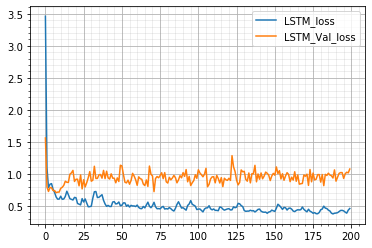

In [113]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.plot(history_model_lstm.history['loss'], label='LSTM_loss')
plt.plot(history_model_lstm.history['val_loss'], label='LSTM_Val_loss')
plt.legend()

In [ ]:
plt.figure(figsize=(40,20))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
y_pred_lstm = model_lstm.predict(X_tst_t)
plt.plot(y_test_sc, label='True')
plt.plot(y_pred_lstm, label='Predicted')
plt.legend()

In [54]:
predsl = model_lstm.predict(X_tst_t)
predsl = scaler.inverse_transform(predsl)

Ytest = scaler.inverse_transform(y_test_sc)

In [55]:
predsl=abs(predsl)

<Figure size 2880x1440 with 0 Axes>

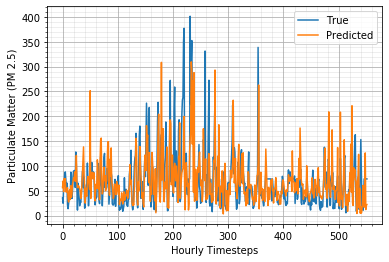

In [56]:
plt.figure(figsize=(40,20))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.plot(Ytest, label='True')
plt.plot(predsl, label='Predicted')
plt.xlabel("Hourly Timesteps")
plt.ylabel("Particulate Matter (PM 2.5)")
plt.legend()
plt.savefig('Fig69.pdf', dpi=300, bbox_inches='tight')

In [118]:
predsl

array([[ 45.57261   ],
       [ 46.761597  ],
       [ 43.68076   ],
       [ 75.85863   ],
       [ 82.57519   ],
       [ 57.51327   ],
       [ 48.039326  ],
       [ 43.383194  ],
       [ 44.929035  ],
       [ 57.915096  ],
       [ 41.936337  ],
       [ 35.499878  ],
       [ 35.98797   ],
       [ 48.598274  ],
       [ 34.245945  ],
       [ 37.529522  ],
       [ 41.02105   ],
       [ 43.923912  ],
       [ 49.385143  ],
       [ 54.785107  ],
       [ 68.71317   ],
       [ 92.729095  ],
       [107.61966   ],
       [ 75.89343   ],
       [ 93.386116  ],
       [119.26304   ],
       [ 67.73368   ],
       [ 54.885914  ],
       [ 51.3304    ],
       [ 63.238213  ],
       [ 48.054592  ],
       [ 52.9661    ],
       [ 38.61634   ],
       [ 37.542904  ],
       [ 38.591236  ],
       [ 69.31649   ],
       [101.81044   ],
       [100.55344   ],
       [104.115875  ],
       [101.37639   ],
       [ 55.30007   ],
       [ 35.13212   ],
       [ 53.506054  ],
       [ 39

In [119]:
Ytest

array([[ 35.21473573],
       [ 24.87093165],
       [ 59.32721683],
       [ 62.95818943],
       [ 86.38265726],
       [ 87.97287667],
       [ 71.41926619],
       [ 50.85208705],
       [ 65.67558357],
       [ 21.52517083],
       [ 13.90398516],
       [ 24.45996126],
       [ 49.67106093],
       [ 49.79290287],
       [ 34.70817066],
       [ 87.46600884],
       [ 48.21347185],
       [ 34.4191412 ],
       [ 48.97708651],
       [ 79.27100522],
       [ 89.90604787],
       [ 77.72964247],
       [ 90.91797799],
       [ 56.614131  ],
       [128.13381824],
       [102.70044387],
       [ 55.87096188],
       [ 11.11483981],
       [ 65.40010696],
       [ 48.18784225],
       [ 35.95697429],
       [ 19.80098039],
       [ 28.30990074],
       [ 26.36370851],
       [ 41.59894958],
       [ 59.24737395],
       [ 88.64341206],
       [ 91.81849243],
       [ 56.3783815 ],
       [ 77.14714635],
       [ 14.91129287],
       [ 18.06857871],
       [ 42.67612708],
       [ 61

### Predicting Multiple Values

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [101]:
df = pd.read_excel('UCIM.xlsx')

In [102]:
dataset = df[['date', 'month', 'day', 'air_pressure', 'air_temp',
       'cumulative_rain_hours', 'cumulative_snow_hours', 'dew_point',
       'wind_speed', 'pm2.5']]
from collections import Counter
cut = int(dataset.shape[0]*0.8)
train = dataset.loc[:cut]
test = dataset.loc[cut:]

train = train.drop(['date'], axis=1)
test = test.drop(['date'], axis=1)
for s in range(1,25):
    train['shift_{}'.format(s)] = train['pm2.5'].shift(s)
    test['shift_{}'.format(s)] = test['pm2.5'].shift(s)

for i in range(-1,-25,-1):
    train['lag_{}'.format(i)] = train['pm2.5'].shift(i)
    test['lag_{}'.format(i)] = test['pm2.5'].shift(i)

train = train.drop('pm2.5', axis=1)
test = test.drop('pm2.5', axis=1)

In [103]:
target_vars = ['lag_-1','lag_-2','lag_-3','lag_-4',
               'lag_-5','lag_-6','lag_-7','lag_-8']
X_train = train.dropna().drop(target_vars, axis=1)
y_train = train.dropna()[target_vars]

X_test = test.dropna().drop(target_vars, axis=1)
y_test = test.dropna()[target_vars]

X_train_sc = StandardScaler().fit_transform(X_train)
y_train_sc = StandardScaler().fit_transform(y_train)

X_test_sc = StandardScaler().fit_transform(X_test)
y_test_sc = StandardScaler().fit_transform(y_test)

In [104]:
X_tr_t = X_train_sc.reshape(X_train_sc.shape[0], 1, X_train_sc.shape[1])

X_tst_t = X_test_sc.reshape(X_test_sc.shape[0], 1, X_test_sc.shape[1])

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.optimizers import Adagrad
from keras import regularizers
import keras.backend as K

In [106]:
## Hyperparameter for Deep Learning
learning_rate = 0.01
training_epochs = 500
display_step = 200
factor = 0.10
batch = 128
seed = 7
beta_1 = 0.9
beta_2 = 0.999
epsilon = None
decay = 0.001
np.random.seed(seed)
dims = X_train_sc.shape[1]

In [107]:
K.clear_session()
model_lag = Sequential()
model_lag.add(LSTM(128, input_shape=(1, dims),
                    activation='relu',kernel_initializer='lecun_uniform',
                    return_sequences=False,
                    kernel_regularizer=regularizers.l2(0.01)))
                    kernel_regularizer=regularizers.l2(0.01)))
model_lstm.add(Dense(64, activation='relu'))
model_lag.add(Dense(y_train_sc.shape[1]))
model_lag.compile(loss='mean_squared_error', optimizer=Adam(lr=learning_rate))
history_model_lag = model_lag.fit(X_tr_t,y_train_sc,epochs=training_epochs,
                                    batch_size=batch,verbose=1,shuffle=False,
                                    validation_data=(X_tst_t, y_test_sc))

IndentationError: unexpected indent (<ipython-input-107-c1ae41d0a905>, line 7)

In [ ]:
plt.figure(figsize=(20,7))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.plot(history_model_lag.history['loss'])
plt.plot(history_model_lag.history['val_loss'])

In [ ]:
pred= model_lag.predict(X_tr_t)

In [ ]:
plt.figure(figsize=(20,7))
fig, ax = plt.subplots(1, 1)  
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


plt.plot(y_train_sc, 'y')
plt.plot(pred, 'r--')
plt.show()

In [ ]:
beg=0


selected_input = X_tst_t[beg:beg+1,:,:]
real_output = y_test_sc[beg:beg+1]
predicted_output = model_lag.predict(selected_input)



predicted_output=np.transpose(predicted_output)
real_output=np.transpose(real_output)


In [ ]:
plt.figure(figsize=(15,7))
plt.plot(predicted_output,'r')
plt.plot(real_output, 'b')
plt.show()